# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice_roll(k):
    return random.choices(range(1, 7), k=k)
df_dice_roll = pd.DataFrame(dice_roll(10),columns=['dice_number'])
df_dice_roll

,dice_number
0,4
1,4
2,6
3,2
4,5
5,2
6,5
7,1
8,4
9,3


#### 2.- Plot the results sorted by value.

In [3]:
# your code here
df_sorted = df_dice_roll.sort_values('dice_number')
df_sorted

,dice_number
7,1
3,2
5,2
9,3
0,4
1,4
8,4
4,5
6,5
2,6


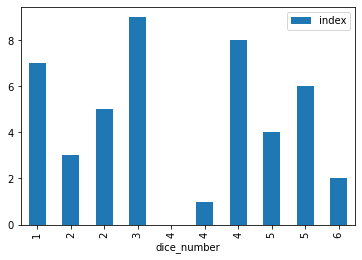

In [4]:
# PLOT 1

df_sorted.reset_index().plot.bar(x='dice_number', y='index')
# This plot doesn't look sorted because it the bar hight is defined by index position so the whole plot looks confusing.

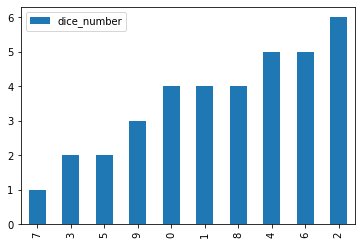

In [5]:
# PLOT 2

df_sorted.plot.bar()
# This plot visually looks as sorted but it's still confusing as dice values are presented on axis y, i.e. as hight of bars.

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [6]:
# your code here
def freq(d_series):
    df_dice_roll_freq = d_series.value_counts().to_frame()
    df_dice_roll_freq.columns = ['frequency']
    return df_dice_roll_freq
freq(df_dice_roll['dice_number'])

,frequency
4,3
5,2
2,2
6,1
3,1
1,1


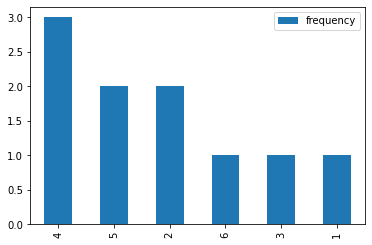

In [7]:
# PLOT 3

freq(df_dice_roll['dice_number']).plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BA081D90>]],
      dtype=object)

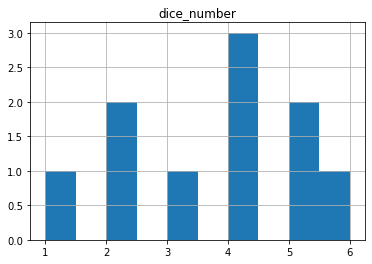

In [8]:
# PLOT 4

df_dice_roll.hist()

In [ ]:
"""
your comments here

On plot 1 we have 10 bars for each dice roll sorted by it's value. On plot 3 we have only 4 bars which represents unique values
of our dice numbers. Axis y represents frequency each value repeats in our data.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here
def my_mean(d_series):
    return sum(d_series)/d_series.count()
my_mean(df_dice_roll['dice_number'])

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
freq(df_dice_roll['dice_number']) # We have calculated frequency in challenge 1 so I just take that result.
my_mean(freq(df_dice_roll['dice_number'])['frequency'])
# Don't really understand what does this sort of analysis mean.

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here
def my_median(d_series):
    sorted_data = d_series.sort_values().reset_index().drop('index', axis=1)
    i = int(round(sorted_data.count()/2)-1) # i for index (not for sequential number of elements)
    if int(sorted_data.count())%2 != 0:
        return (sorted_data.loc[i])
    else:
        return ((sorted_data.loc[i]+sorted_data.loc[i+1])/2)
my_median(df_dice_roll['dice_number'])

dice_number    4.0
dtype: float64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here

'''
I guess the idea of the task was to calculate all 3 values in such an efficient way that it can easily fit in one function,
but unfortunately I coundn't see that way so I split final task in few small functions.
'''

In [14]:
d_series = df_dice_roll['dice_number']
def quartile_25(d_series):
    sorted_data = d_series.sort_values().reset_index().drop('index', axis=1)
    i25 = int(round(sorted_data.count()/4)-1) # i25 for index (not for sequential number of elements)
    if int(sorted_data.count())%2 != 0:
        return(sorted_data.loc[i25])
    else:
        return((sorted_data.loc[i25]+sorted_data.loc[i25+1])/2)
    # i25 is the index of the first out of 2 elements, that's why the second element in formula should be the next element in the list.
quartile_25(df_dice_roll['dice_number'])

dice_number    2.0
dtype: float64

In [15]:
def quartile_75(d_series):
    sorted_data = d_series.sort_values().reset_index().drop('index', axis=1)
    i75 = int(round(sorted_data.count()/4*3)-1) # i25 for index (not for sequential number of elements)
    if int(sorted_data.count())%2 != 0:
        return(sorted_data.loc[i75])
    else:
        return((sorted_data.loc[i75]+sorted_data.loc[i75-1])/2)
    # i75 is the index of the lowest out of 2 elements, that's why the second element in formula should be previous element in the list.
quartile_75(df_dice_roll['dice_number'])

dice_number    4.5
dtype: float64

In [16]:
def quartiles(d_series):
    q25 = float(quartile_25(d_series))
    q50 = float(my_median(d_series))
    q75 = float(quartile_75(d_series))
    return(f'25 quartile is {q25}, 50 quartile (median) is {q50}, 75 quartile is {q75}.')
#     print(f'mu{q50}')
#     print(f'mu{q75}')
quartiles(df_dice_roll['dice_number'])

'25 quartile is 2.0, 50 quartile (median) is 4.0, 75 quartile is 4.5.'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [17]:
# your code here
df_dice_roll_hundred = pd.DataFrame(dice_roll(100),columns=['dice_number'])
df_dice_roll_hundred.head()

,dice_number
0,1
1,5
2,5
3,5
4,2


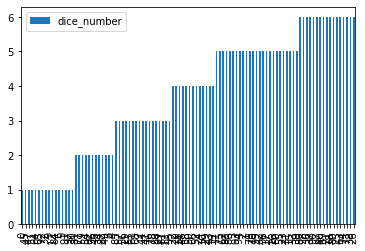

In [18]:
df_sorted_hundred = df_dice_roll_hundred.sort_values('dice_number')
df_sorted_hundred.plot.bar()

In [ ]:
"""
your comments here
As we have only 6 possible values for our data shape of the plot looks almost the same in challenge 1 with 10 elements only.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
df_dice_roll_hundred.describe()

,dice_number
count,100.000000
mean,3.700000
std,1.720348
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [21]:
# your code here
my_mean(df_dice_roll_hundred['dice_number'])

3.7

#### 3.- Now, calculate the frequency distribution.


In [22]:
# your code here
freq(df_dice_roll_hundred['dice_number'])

,frequency
5,25
6,17
3,17
1,16
4,13
2,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BA025D90>]],
      dtype=object)

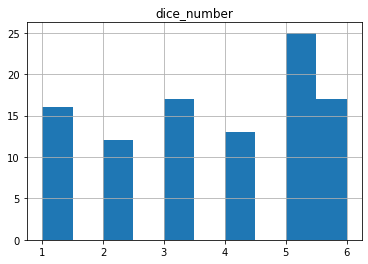

In [23]:
# your code here
df_dice_roll_hundred.hist()

In [ ]:
"""
your comments here
Histogram for 100 elements happens to be more diverse than histogram for 10 elements.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [25]:
# your code here
df_dice_roll_thousand = pd.DataFrame(dice_roll(1000),columns=['dice_number'])
df_dice_roll_thousand.head()

,dice_number
0,4
1,2
2,2
3,2
4,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BA42E550>]],
      dtype=object)

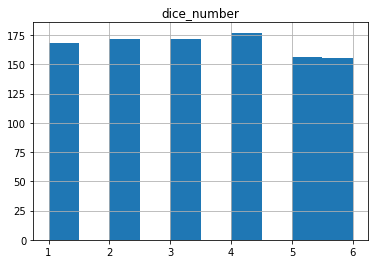

In [26]:
df_dice_roll_thousand.hist()

In [ ]:
"""
your comments here
Distribution happens to be more even as in previous versions with 10 and 100 elements. It's a good visualisation of how
probability theory works.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [28]:
# your code here
ages1 = pd.read_csv('..\\data\\ages_population.csv')
ages1.head()
ages1.shape

(1000, 1)

In [29]:
freq(ages1['observation'])

,frequency
39.0,45
41.0,36
30.0,34
35.0,33
43.0,32
...,...
70.0,1
71.0,1
7.0,1
69.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BA4929D0>]],
      dtype=object)

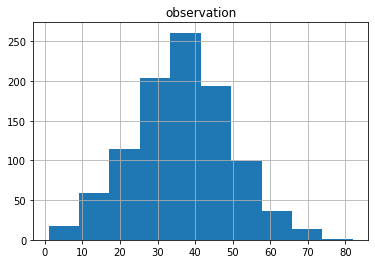

In [30]:
ages1.hist()
# mean looks to be about 37-38 (mean between about 33 and about 42).
# st.deviation looks to be 11-12 (mean between about 26 and about 49).

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [31]:
# your code here
print(ages1.mean())
print(ages1.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
your comments here
My guesses were close but correct values where in in ranges I've defined.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [33]:
# your code here
ages2 = pd.read_csv('..\\data\\ages_population2.csv')
ages2.head()
ages2.shape

(1000, 1)

In [34]:
freq(ages2['observation'])

,frequency
28.0,139
27.0,125
26.0,120
29.0,115
25.0,98
30.0,90
24.0,78
31.0,61
23.0,41
22.0,35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BA49AB50>]],
      dtype=object)

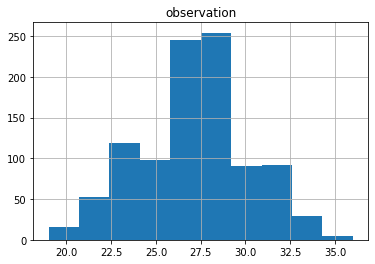

In [35]:
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
Distribution of the second data set is more sharp. It means that population in district 2 is much less diverse regarding age
than district 1.
Also age range is much smaller (around 19-36) comparing with data set 1 (around 0-82) (exact ranges can be caluculated by using
min & max methods). This reduse diversity even more.
Total amount of observations is the same (checked in cells above) and this amount is high enouth to suggest that data sets are
representative.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [37]:
# your code here
print(ages1.mean())
print(ages1.std())

print(ages2.mean())
print(ages2.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64
observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
your comments here
St.deviation of data set 2 is much smaller than st.deviation of data set 1 which confirms our previous conclusion that district
2 is much less diverse regarding age than district 1.

Mean of data set 2 is less than data set 1, it means that in general population in disctict 2 are younger than in district 1.

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [39]:
# your code here
ages3 = pd.read_csv('..\\data\\ages_population3.csv')
ages3.head()
ages3.shape

(1000, 1)

In [40]:
freq(ages3['observation'])

,frequency
32.0,37
35.0,31
37.0,31
39.0,29
36.0,26
...,...
76.0,1
9.0,1
1.0,1
5.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BB561880>]],
      dtype=object)

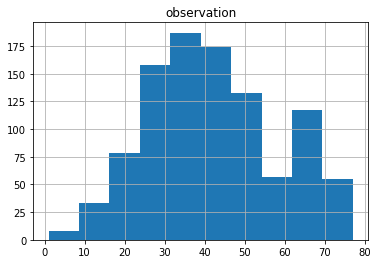

In [41]:
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [42]:
# your code here
print(ages3.mean())
print(ages3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
your comments here
This graph is slightly left skewed, in this case it means there are more elder people rather than younger people in population.
It also has a second peak in a group of age about 62-69.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [44]:
quartiles(ages3['observation'])
# Just to see that my tailored function gives the same result as build-in method.

'25 quartile is 30.0, 50 quartile (median) is 40.0, 75 quartile is 53.0.'

In [45]:
# your code here
ages3.quantile([0.25,0.5,0.75])

,observation
0.25,30.0
0.50,40.0
0.75,53.0


In [46]:
ages3.mean() - ages3.median()

observation    1.989
dtype: float64

In [ ]:
"""
your comments here
Quater of popluation is above age 30 and other quater is below age 53. Our interquartile range is 30-53 which means that
50% of population are in age between 30 and 53.
Mean and median are close to each other which means that our distribution is fairly symmetrical.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [48]:
# your code here
print(ages3.quantile(0.01))
print(ages3.quantile(0.99))

observation    10.0
Name: 0.01, dtype: float64
observation    74.0
Name: 0.99, dtype: float64


In [ ]:
"""
your comments here
About 1% of the population is in age group below 10 and another 1% is in the group above 74 years, it means that 98% of the
population is in age range from 10 to 74.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [50]:
# your code here

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BB5D9850>]],
      dtype=object)

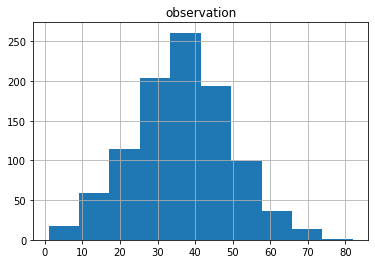

In [51]:
ages1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BB645700>]],
      dtype=object)

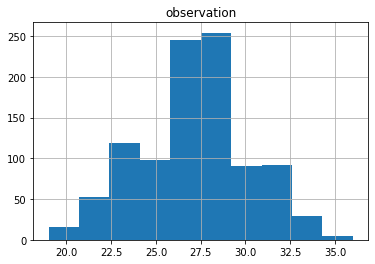

In [52]:
ages2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5BB6C27F0>]],
      dtype=object)

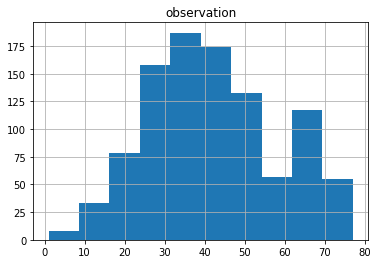

In [53]:
ages3.hist()

In [54]:
mean1 = ages1.mean()
mean2 = ages2.mean()
mean3 = ages3.mean()
std1 = ages1.std()
std2 = ages2.std()
std3 = ages3.std()
max1 = ages1.max()
max2 = ages2.max()
max3 = ages3.max()
min1 = ages1.min()
min2 = ages2.min()
min3 = ages3.min()
print(f'mean1 = {float(mean1)}, mean2 = {float(mean2)}, mean3 = {float(mean3)}.')
print(f'std1 = {round(float(std1), 2)}, std2 = {round(float(std2), 2)}, std3 = {round(float(std3), 2)}.')
print(f'max1 = {float(max1)}, max2 = {float(max2)}, max3 = {float(max3)}.')
print(f'min1 = {float(min1)}, min2 = {float(min2)}, min3 = {float(min3)}.')

mean1 = 36.56, mean2 = 27.155, mean3 = 41.989.
std1 = 12.82, std2 = 2.97, std3 = 16.14.
max1 = 82.0, max2 = 36.0, max3 = 77.0.
min1 = 1.0, min2 = 19.0, min3 = 1.0.


In [ ]:
"""
your comments here
D1, D2, D3 = districts 1, 2 & 3 respectively
As we can see from the ranges it doesn't have any people below 19 or above 36 so we can assume that D2 is some sort of
student campus.
Also popluation of D2 is very homogeneous comparing with other two districts, we can see it from the st.deviation value
which is very small for diverse population.
Regarding two other districts, allthough maximum age in D3 is lower than in D1 (77 vs 82), average age in D3 is higher than
average age in D1 (42 vs 36.5). It means that population in D3 is skewed into elders.
"""